# Banking Marketing Targets

<h1 style= "font-weight: bold; color:#000000;">Intro</h1>

## Context

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

Content
The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. 

Data set: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)

Detailed Column Descriptions
bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has a delinquent credit? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

### Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

#### Other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

### Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [6]:
# General
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn import metrics

# Model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<h1 style= "font-weight: bold; color:#000000;">Import data</h1>

In [7]:
df = pd.read_csv("banking_marketing.csv", sep=";")

In [8]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


<h2 style= "font-weight: bold; color:#000000;">Basic Visualizations</h2>

<h2 style= "font-weight: bold; color:#000000;">Categorical features proportions Function</h2>

<h2 style= "font-weight: bold; color:#000000;">Job, Housing, Marital and Education Distributions</h2>

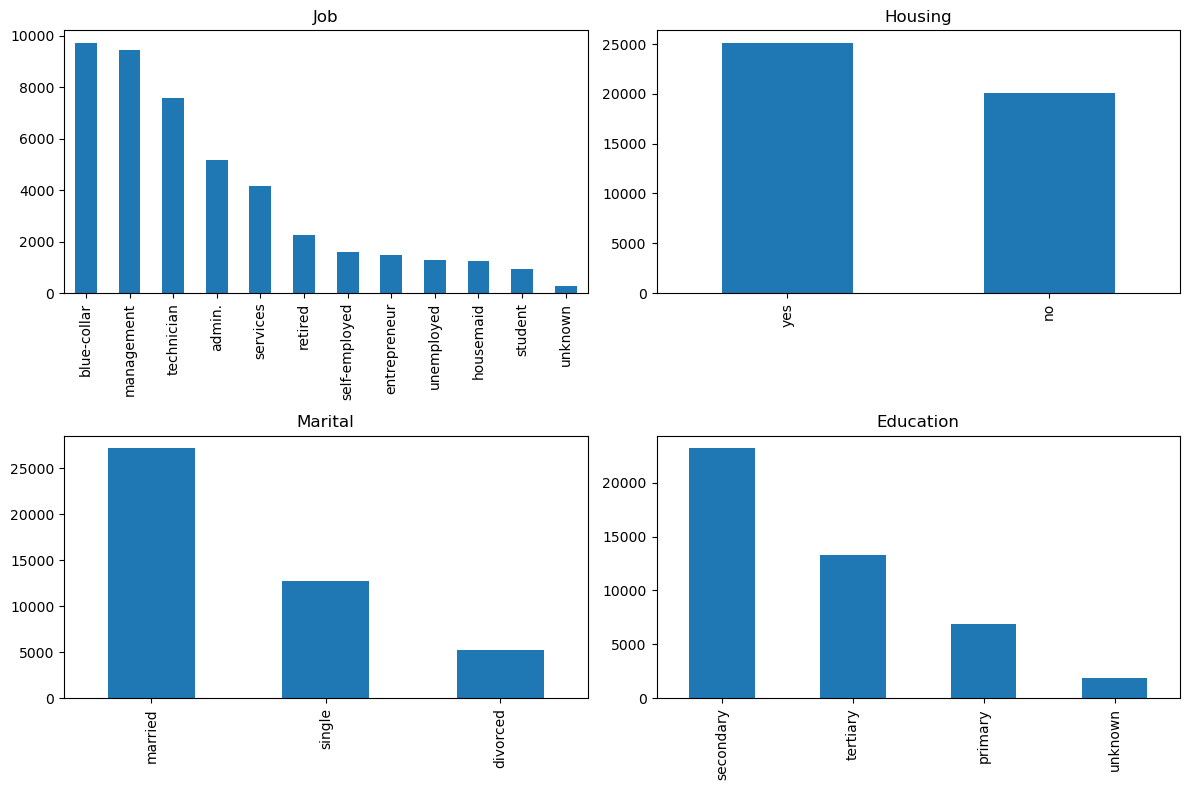

In [9]:
# Create a figure and a grid of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the first education count plot in the first subplot
df['job'].value_counts().plot(kind='bar', ax=axes[0, 0], title = 'Job')

# Plot the second education count plot in the second subplot
df['housing'].value_counts().plot(kind='bar', ax=axes[0, 1], title = 'Housing')

# Plot the third education count plot in the third subplot
df['marital'].value_counts().plot(kind='bar', ax=axes[1, 0], title = 'Marital')

# Plot the fourth education count plot in the fourth subplot
df['education'].value_counts().plot(kind='bar', ax=axes[1, 1], title = 'Education')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<h2 style= "font-weight: bold; color:#000000;">Default, Loan, Contact and Poutcome Distributions</h2>

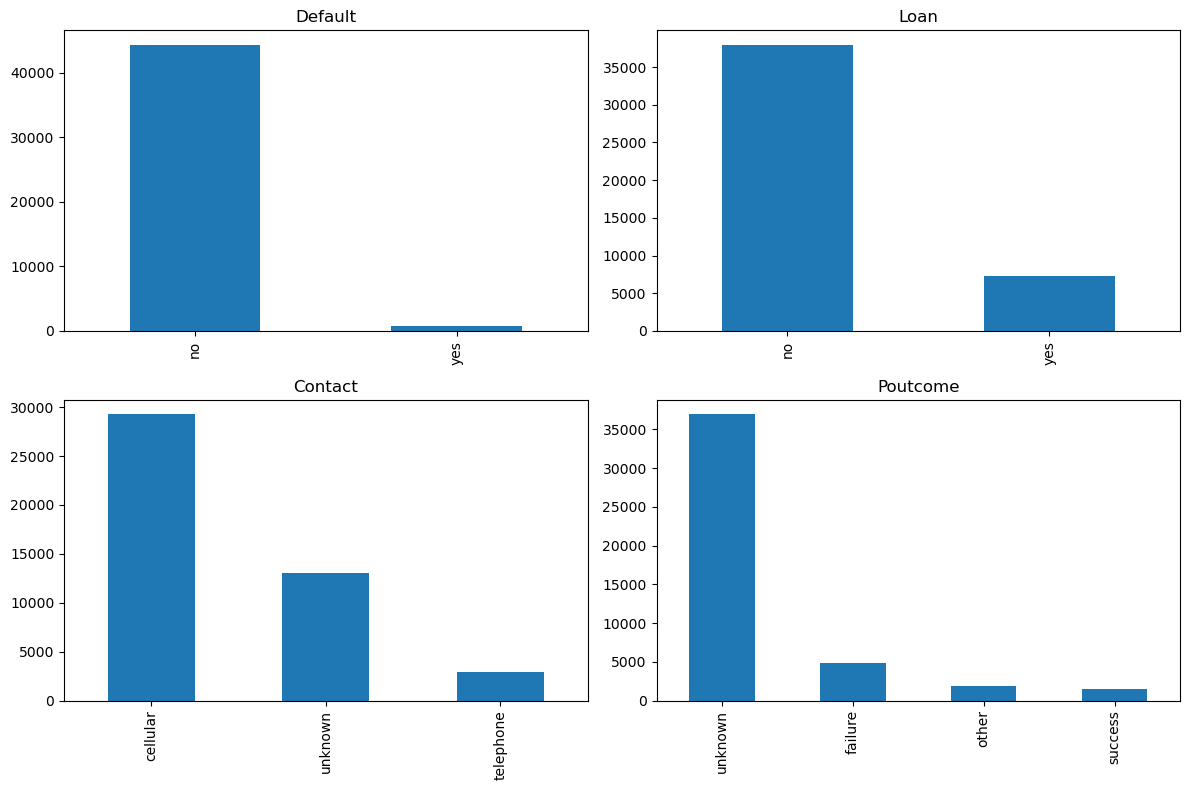

In [10]:
# Create a figure and a grid of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the first education count plot in the first subplot
df['default'].value_counts().plot(kind='bar', ax=axes[0, 0], title = 'Default')

# Plot the second education count plot in the second subplot
df['loan'].value_counts().plot(kind='bar', ax=axes[0, 1], title = 'Loan')

# Plot the third education count plot in the third subplot
df['contact'].value_counts().plot(kind='bar', ax=axes[1, 0], title = 'Contact')

# Plot the fourth education count plot in the fourth subplot
df['poutcome'].value_counts().plot(kind='bar', ax=axes[1, 1], title = 'Poutcome')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

<h2 style= "font-weight: bold; color:#000000;">Target Variable</h2>

<Axes: >

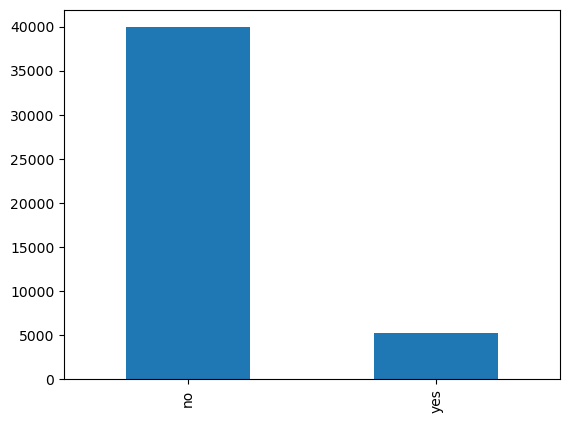

In [11]:
df['y'].value_counts().plot(kind = 'bar')

<h2 style= "font-weight: bold; color:#000000;">Target Variable Proportions (pie chart)</h2>

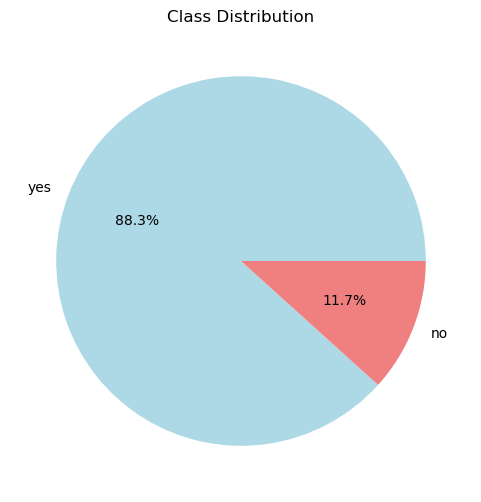

In [12]:
from collections import Counter

plt.figure(figsize=(6, 6))

class_counts = Counter(df['y'])

labels = ['yes', 'no']
colors = ['lightblue', 'lightcoral']

plt.pie(class_counts.values(), labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Class Distribution')

# Show the chart
plt.show()

<p style= "font-family:Calibri; color:#46555b; font-size:17px"> Unbalanced Target Variable!! </p>

<h2 style= "font-weight: bold; color:#000000;">Numerical features analysis</h2>

<h2 style= "font-weight: bold; color:#000000;">Recode the target variable <i>(no = 0 yes = 1)</i></h2>

In [13]:
label_encoder = LabelEncoder()

df["y"] = label_encoder.fit_transform(df["y"]) 

In [14]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

<h2 style= "font-weight: bold; color:#000000;">Numerical features (pairplot)</h2>

In [15]:
Num_feats = df.select_dtypes("integer").copy()
Num_feats

,age,balance,day,duration,campaign,pdays,previous,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1
45207,71,1729,17,456,2,-1,0,1
45208,72,5715,17,1127,5,184,3,1
45209,57,668,17,508,4,-1,0,0


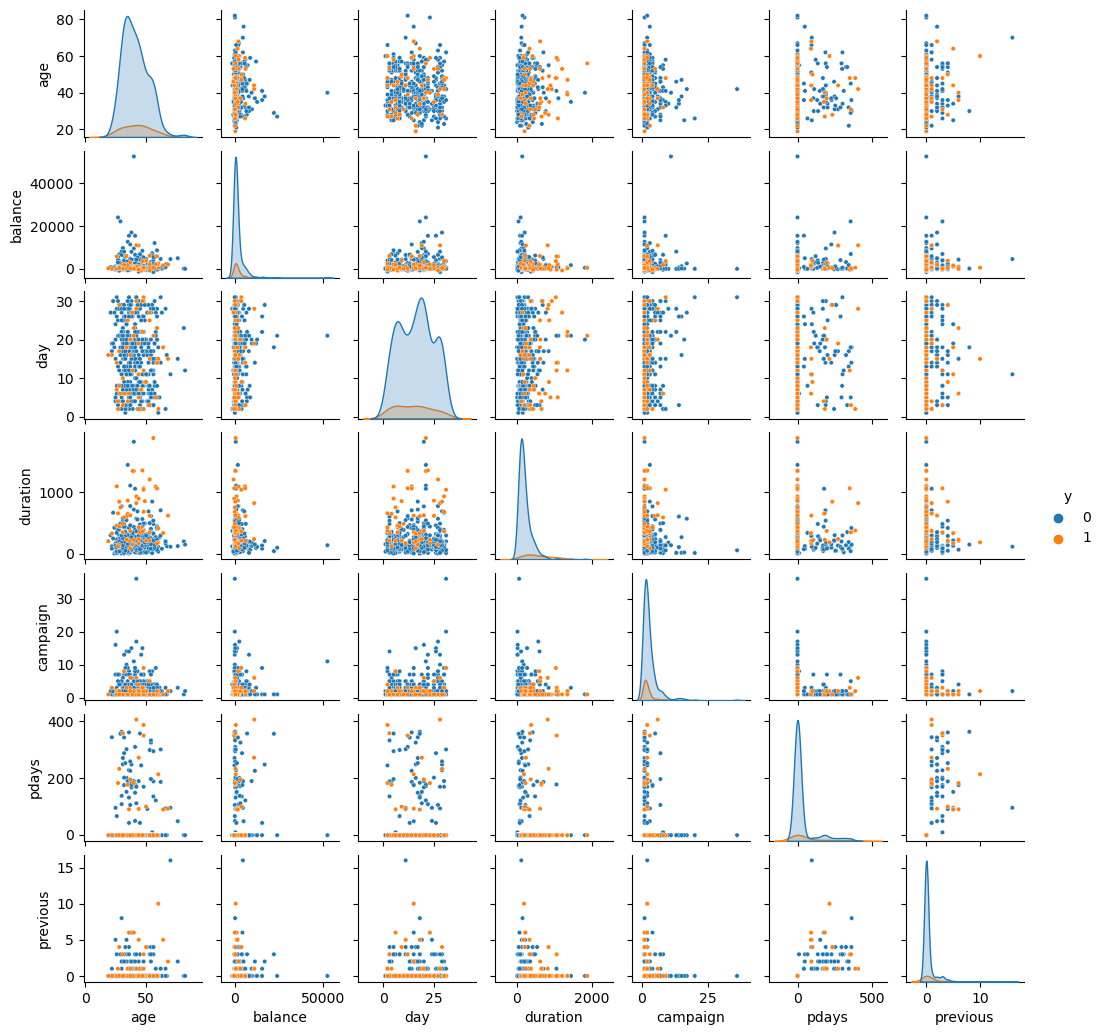

In [16]:
sample_for_pair_plot = Num_feats.groupby("y", group_keys=False).apply(
    lambda x: x.sample(frac=0.01)
)

sns.pairplot(
    sample_for_pair_plot,
    hue="y",
    kind="scatter",
    diag_kind="kde",
    height=1.5,
    aspect=1,
    plot_kws=dict(s=10),
)
plt.show()

<h2 style= "font-weight: bold; color:#000000;">Age, Duration, Balance and Campaign Variables</h2>

<h2 style= "font-weight: bold; color:#000000;">Creating a Function</h2>

In [17]:
def num_distributions(var_1, var_2):

    age_dur = df[[var_1, var_2, "y"]]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    ## HistPlot

    sns.histplot(
        data=age_dur,
        kde=True,
        line_kws={"lw": 1.5, "alpha": 0.6},
        x=var_1,
        bins=20,
        hue="y",
        alpha=0.6,
        ax=ax1,
    )
    ax1.legend(
        title="Subscribed?",
        loc="upper right",
        labels=["YES", "NO"],
        ncol=2,
        frameon=True,
        shadow=True,
        title_fontsize=8,
        prop={"size": 7},
        bbox_to_anchor=(1.18, 1.25),
    )
    ax1.set_xlabel(str.title(var_1), fontsize=10)
    ax1.set_ylabel("Frequency", fontsize=10)
    ax1.set_title(str.title(var_1) + " distributions", fontsize=12)
    ax1.yaxis.set_major_formatter(ticker.EngFormatter())

    ## Scatter plot

    sns.scatterplot(
        data=age_dur,
        x=var_1,
        y=var_2,
        hue="y",
        ax=ax2,
        legend=False,
        alpha=0.6,
    )
    ax2.yaxis.set_major_formatter(ticker.EngFormatter())
    ax2.set_title(str.title(var_2) + " distributions", fontsize=12)
    ax2.set_ylabel(str.title(var_2), fontsize=10)
    ax2.set_xlabel(str.title(var_1), fontsize=10)

    return

<h2 style= "font-weight: bold; color:#000000;">Age and Balance</h2>

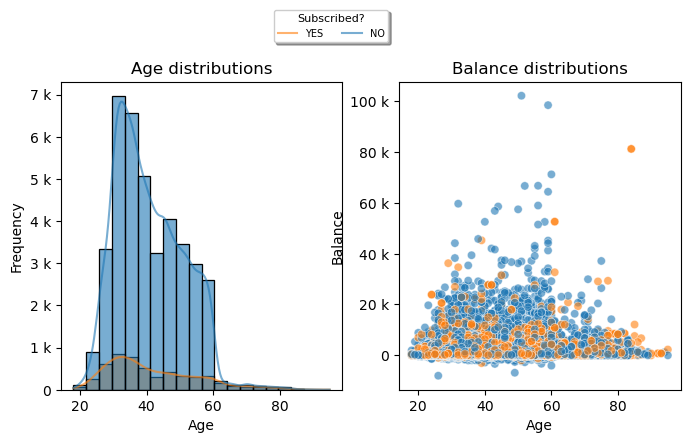

In [18]:
num_distributions("age", "balance")

<h2 style= "font-weight: bold; color:#000000;">Balance and Campaign</h2>

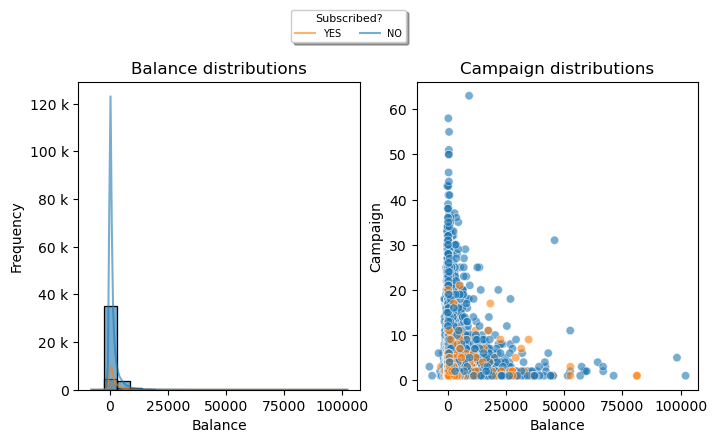

In [19]:
num_distributions("balance", "campaign")

<h2 style= "font-weight: bold; color:#000000;">Default and target Variable "y"</h2>

In [20]:
df[["default", "y"]] \
.value_counts() \
.reset_index() \
.rename(columns={0: "counts"}) \
.style.background_gradient()

,default,y,counts
0,no,0,39159
1,no,1,5237
2,yes,0,763
3,yes,1,52


<h2 style= "font-weight: bold; color:#000000;">Default, Balance and target Variable "y"</h2>

In [21]:
df[["balance", "default", "y"]] \
.groupby(["default", "y"])["balance"] \
.agg(["mean", "count"]) \
.style.background_gradient()

In [22]:
# Create an empty DataFrame with 'Job' and 'Education_Ratio' columns
eduRatio = pd.DataFrame(columns=['Job', 'Education_Ratio', 'Most common edducation'])

# Loop through unique job categories in the 'train' DataFrame
for job in df['job'].unique():
    # Filter the DataFrame to include only rows with the current job
    job_data = df[df['job'] == job]
    
    # Calculate the education ratio for the current job category
    education_counts = job_data['education'].value_counts(normalize=True)
    most_common_education = education_counts.idxmax()
    education_ratio = education_counts.max() * 100    
    
    # Create a new DataFrame with the job and education ratio
    new_row = pd.DataFrame({'Job': [job], 'Education_Ratio': [education_ratio], 'Most common edducation': [most_common_education]})
    
    # Append the new row to 'eduRatio' using pd.concat
    eduRatio = pd.concat([eduRatio, new_row], ignore_index=True)

# Display the 'eduRatio' DataFrame
eduRatio

,Job,Education_Ratio,Most common edducation
0,management,82.480440,tertiary
1,technician,68.829801,secondary
2,entrepreneur,46.133154,tertiary
3,blue-collar,55.189067,secondary
4,unknown,44.097222,unknown
5,retired,43.462898,secondary
6,admin.,81.589635,secondary
7,services,83.220992,secondary
8,self-employed,52.754908,tertiary
9,unemployed,55.871067,secondary


In [23]:
df.loc[(df.job == "unknown") & (df.education == "secondary"),"job"] = "services"
df.loc[(df.job == "unknown") & (df.education == "primary"),"job"] = "housemaid"
df.loc[(df.job == "unknown") & (df.education == "tertiary"),"job"] = "management"
df.loc[(df.job == "unknown"),"job"] = "blue-collar"

In [24]:
df.loc[(df.education == "unknown") & (df.job == "admin."),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "management"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "services"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "technician."),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "retired"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "blue-collar"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "housemaid."),"education"] = "primary"
df.loc[(df.education == "unknown") & (df.job == "self-employed"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "student"),"education"] = "secondary"
df.loc[(df.education == "unknown") & (df.job == "entrepreneur"),"education"] = "tertiary"
df.loc[(df.education == "unknown") & (df.job == "unemployed"),"education"] = "secondary"
#REST CAN BE SECONDARY
df.loc[(df.education == "unknown"),"education"] = "secondary"

In [25]:
df["contact"].replace(["unknown"], df["contact"].mode(),inplace = True) # I replace unknown contact values with mode value

In [26]:
df.balance.sort_values()

12909     -8019
15682     -6847
38736     -4057
7413      -3372
1896      -3313
          ...  
41693     71188
42558     81204
43393     81204
26227     98417
39989    102127
Name: balance, Length: 45211, dtype: int64

In [27]:
df = df[df.balance < 66721]

In [28]:
df.drop(columns = ['duration', 'pdays'],inplace = True)

<h1 style= "font-weight: bold; color:#000000;">Checking data Types</h1>

<h2 style= "font-weight: bold; color:#000000;">Convert object data type to category</h2>

In [29]:
cols_to_category = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "poutcome",
]

df[cols_to_category] = df[cols_to_category].astype("category")

<h2 style= "font-weight: bold; color:#000000;">6. Model</h2>

In [30]:
rf_seed = 345
np.random.seed(rf_seed)

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,1,0,unknown,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,1,0,unknown,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,0,unknown,0


In [32]:
X = df.iloc[:, :-1]
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,1,0,unknown
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,1,0,unknown
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,1,0,unknown


In [33]:
y = df[["y"]]
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


<h2 style= "font-weight: bold; color:#000000;">6.1 Encoding</h2>

In [34]:
categorical_columns = list(X.select_dtypes(include="category").columns.values)
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

#### I will remove the education variable for it is to be encoded as an ordinal type!

In [35]:
categorical_columns.remove("education")
categorical_columns

['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

<Axes: >

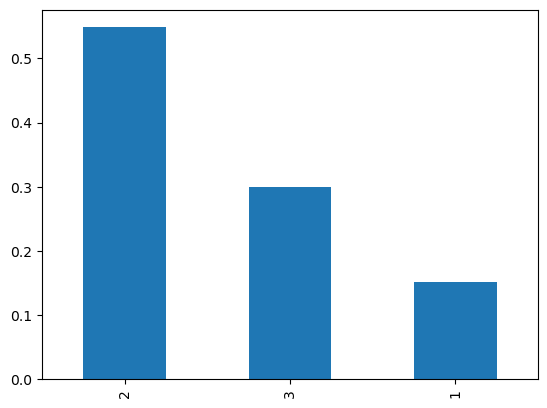

In [36]:
recode_education_var = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}
X["education"] = X["education"].replace(recode_education_var)
X["education"].value_counts(normalize=True).plot(kind='bar')

In [37]:
X = pd.get_dummies(X, prefix=categorical_columns, columns=categorical_columns, drop_first=True)
X.dtypes

age                     int64
education            category
balance                 int64
day                     int64
campaign                int64
previous                int64
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
marital_married         uint8
marital_single          uint8
default_yes             uint8
housing_yes             uint8
loan_yes                uint8
contact_telephone       uint8
month_aug               uint8
month_dec               uint8
month_feb               uint8
month_jan               uint8
month_jul               uint8
month_jun               uint8
month_mar               uint8
month_may               uint8
month_nov               uint8
month_oct               uint8
month_sep               uint8
poutcome_o

In [38]:
# Convert remaining non-numeric columns to numeric, if any
X = X.apply(pd.to_numeric, errors='ignore')
X.dtypes

age                  int64
education            int64
balance              int64
day                  int64
campaign             int64
previous             int64
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
marital_married      uint8
marital_single       uint8
default_yes          uint8
housing_yes          uint8
loan_yes             uint8
contact_telephone    uint8
month_aug            uint8
month_dec            uint8
month_feb            uint8
month_jan            uint8
month_jul            uint8
month_jun            uint8
month_mar            uint8
month_may            uint8
month_nov            uint8
month_oct            uint8
month_sep            uint8
poutcome_other       uint8
poutcome_success     uint8
poutcome_unknown     uint8
dtype: object

In [39]:
# Convert boolean dummy columns to integers (1 and 0)
X = X.astype(int)
X.head()

,age,education,balance,day,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,2143,5,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,44,2,29,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,2,5,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,2,1506,5,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,2,1,5,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
y.shape

(45205, 1)

### Scale the data

In [41]:
X

,age,education,balance,day,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,2143,5,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,44,2,29,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,2,5,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,47,2,1506,5,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,2,1,5,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,825,17,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1,1729,17,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,2,5715,17,5,3,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,2,668,17,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [42]:
# Define standard scaler
scaler = StandardScaler()

# Transform data
scaled = scaler.fit_transform(X)

In [43]:
# Convert numpy array to pandas dataframe
X_scaled = pd.DataFrame(scaled, columns = X.columns)
X_scaled

,age,education,balance,day,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.607913,1.299260,0.273886,-1.298613,-0.569365,-0.251914,-0.528137,-0.184427,-0.17146,1.939440,...,-0.424239,-0.365995,-0.103269,1.511230,-0.310243,-0.128739,-0.113906,-0.205928,-0.185897,0.472488
1,0.288953,-0.226591,-0.457513,-1.298613,-0.569365,-0.251914,-0.528137,-0.184427,-0.17146,-0.515613,...,-0.424239,-0.365995,-0.103269,1.511230,-0.310243,-0.128739,-0.113906,-0.205928,-0.185897,0.472488
2,-0.747372,-0.226591,-0.466854,-1.298613,-0.569365,-0.251914,-0.528137,5.422189,-0.17146,-0.515613,...,-0.424239,-0.365995,-0.103269,1.511230,-0.310243,-0.128739,-0.113906,-0.205928,-0.185897,0.472488
3,0.571587,-0.226591,0.053498,-1.298613,-0.569365,-0.251914,1.893449,-0.184427,-0.17146,-0.515613,...,-0.424239,-0.365995,-0.103269,1.511230,-0.310243,-0.128739,-0.113906,-0.205928,-0.185897,0.472488
4,-0.747372,-0.226591,-0.467200,-1.298613,-0.569365,-0.251914,1.893449,-0.184427,-0.17146,-0.515613,...,-0.424239,-0.365995,-0.103269,1.511230,-0.310243,-0.128739,-0.113906,-0.205928,-0.185897,0.472488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45200,0.948433,1.299260,-0.182114,0.143348,0.076187,-0.251914,-0.528137,-0.184427,-0.17146,-0.515613,...,-0.424239,-0.365995,-0.103269,-0.661713,3.223278,-0.128739,-0.113906,-0.205928,-0.185897,0.472488
45201,2.832662,-1.752442,0.130651,0.143348,-0.246589,-0.251914,-0.528137,-0.184427,-0.17146,-0.515613,...,-0.424239,-0.365995,-0.103269,-0.661713,3.223278,-0.128739,-0.113906,-0.205928,-0.185897,0.472488
45202,2.926873,-0.226591,1.509722,0.143348,0.721738,1.050438,-0.528137,-0.184427,-0.17146,-0.515613,...,-0.424239,-0.365995,-0.103269,-0.661713,3.223278,-0.128739,-0.113906,-0.205928,5.379320,-2.116458
45203,1.513702,-0.226591,-0.236433,0.143348,0.398962,-0.251914,1.893449,-0.184427,-0.17146,-0.515613,...,-0.424239,-0.365995,-0.103269,-0.661713,3.223278,-0.128739,-0.113906,-0.205928,-0.185897,0.472488


<h2 style= "font-weight: bold; color:#000000;">6.2 Model</h2>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33,stratify= y, random_state=rf_seed)

In [45]:
y_train.value_counts()/y_train.shape[0]

y
0    0.883052
1    0.116948
dtype: float64

In [46]:
y_test.value_counts()/y_test.shape[0]

y
0    0.883027
1    0.116973
dtype: float64

In [47]:
classes_number = 1

model = keras.Sequential()

model.add(layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(layers.Dense(12, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(classes_number, activation = 'sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)

history = model.fit(X_train, y_train, validation_split = 0.2,
                    batch_size = 64, epochs = 200,
                    callbacks = [early_stop])

Epoch 1/200
379/379 [==============================] - 2s 3ms/step - loss: 0.3495 - accuracy: 0.8792 - val_loss: 0.3098 - val_accuracy: 0.8919
Epoch 2/200
379/379 [==============================] - 1s 2ms/step - loss: 0.3071 - accuracy: 0.8927 - val_loss: 0.3037 - val_accuracy: 0.8944
Epoch 3/200
379/379 [==============================] - 1s 2ms/step - loss: 0.3021 - accuracy: 0.8932 - val_loss: 0.3017 - val_accuracy: 0.8948
Epoch 4/200
379/379 [==============================] - 1s 2ms/step - loss: 0.2988 - accuracy: 0.8937 - val_loss: 0.2997 - val_accuracy: 0.8952
Epoch 5/200
379/379 [==============================] - 1s 2ms/step - loss: 0.2964 - accuracy: 0.8948 - val_loss: 0.2994 - val_accuracy: 0.8947
Epoch 6/200
379/379 [==============================] - 1s 2ms/step - loss: 0.2949 - accuracy: 0.8945 - val_loss: 0.2992 - val_accuracy: 0.8948
Epoch 7/200
379/379 [==============================] - 1s 2ms/step - loss: 0.2932 - accuracy: 0.8957 - val_loss: 0.3003 - val_accuracy: 0.8937

In [49]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

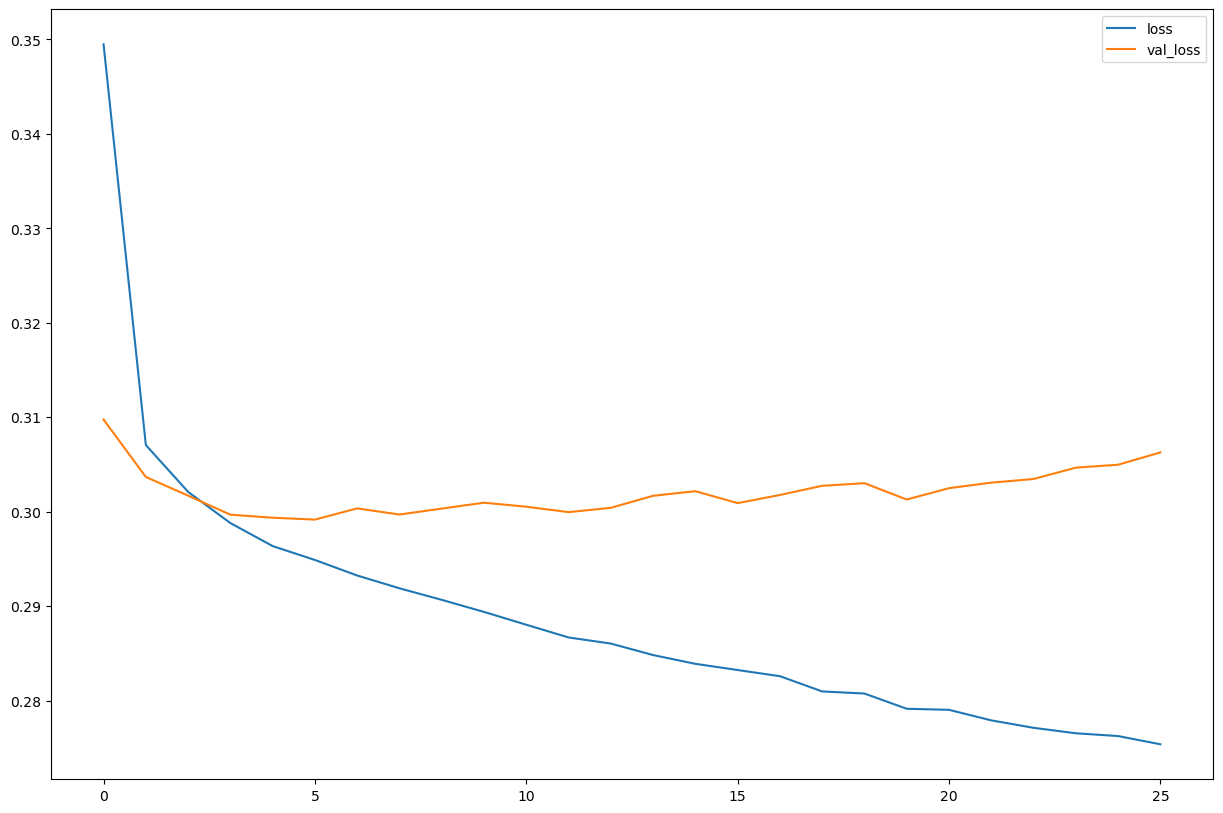

In [50]:
history_df[["loss", "val_loss"]].plot(figsize=(15,10))

<Axes: >

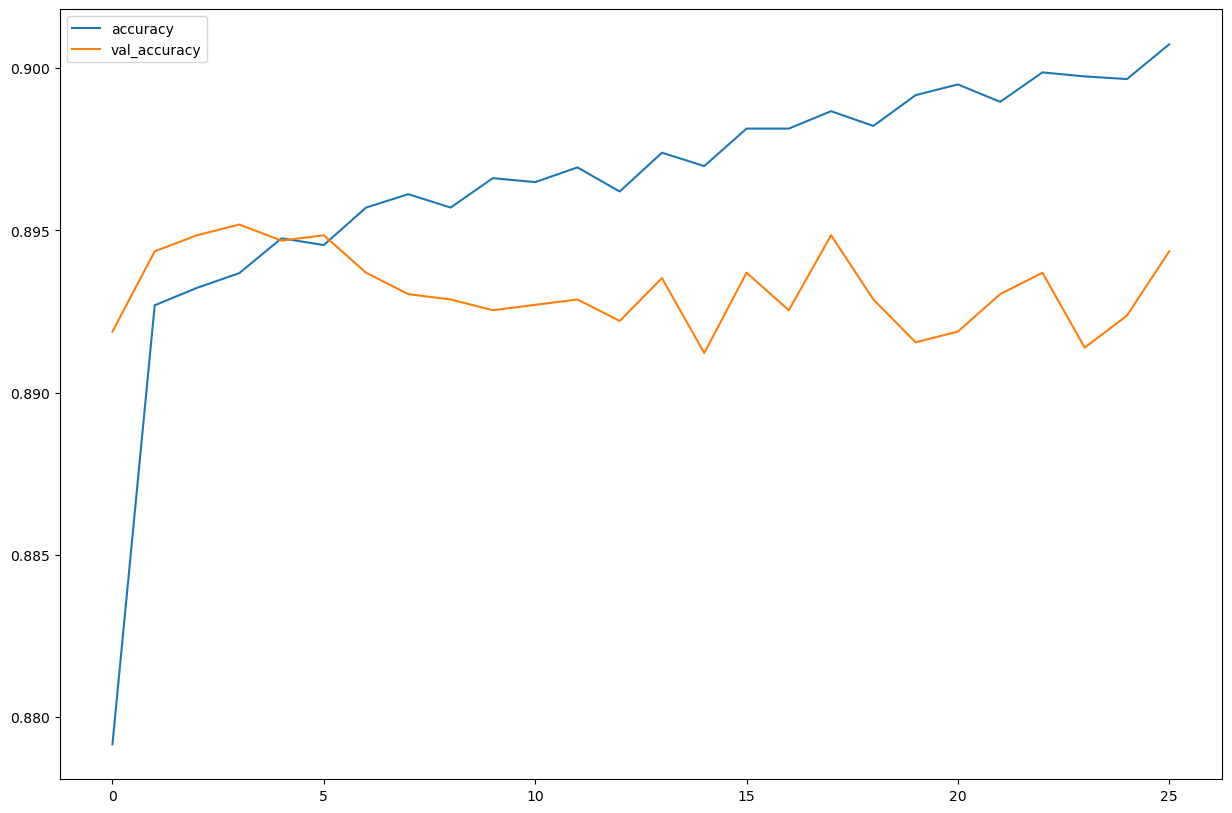

In [51]:
history_df[["accuracy", "val_accuracy"]].plot(figsize=(15,10))

467/467 [==============================] - 1s 1ms/step


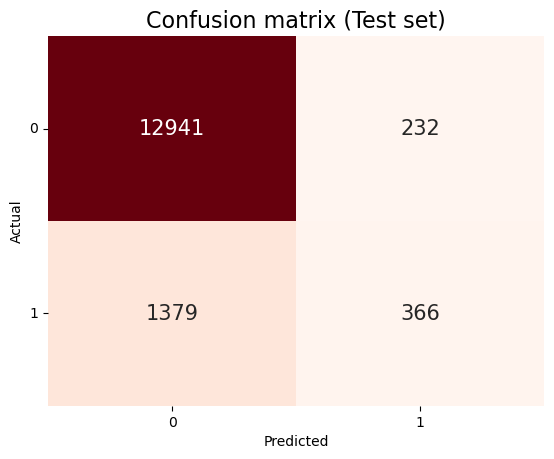

In [52]:
y_predicted = np.round(model.predict(X_test))

sns.heatmap(
    confusion_matrix(y_test, y_predicted),
    annot=True,
    fmt="g",
    cbar=False,
    cmap="Reds",
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (Test set)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
# Assuming you have your true labels and predicted probabilities
true_labels = y_test
predicted_probabilities = model.predict(X_test)

# Calculate accuracy
predicted_labels = (predicted_probabilities >= 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

467/467 [==============================] - 1s 1ms/step
Accuracy: 0.89


### Add regularization

In [55]:
classes_number = 1

model = keras.Sequential()

model.add(layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(layers.Dense(12, activation = 'relu', kernel_regularizer='l2'))
model.add(layers.Dense(8, activation = 'relu', kernel_regularizer='l2'))
model.add(layers.Dense(classes_number, activation = 'sigmoid'))

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)

history = model.fit(X_train, y_train, validation_split = 0.2,
                    batch_size = 64, epochs = 200,
                    callbacks = [early_stop])

Epoch 1/200
379/379 [==============================] - 2s 3ms/step - loss: 0.5012 - accuracy: 0.8790 - val_loss: 0.3686 - val_accuracy: 0.8930
Epoch 2/200
379/379 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8922 - val_loss: 0.3272 - val_accuracy: 0.8934
Epoch 3/200
379/379 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8928 - val_loss: 0.3163 - val_accuracy: 0.8947
Epoch 4/200
379/379 [==============================] - 1s 2ms/step - loss: 0.3168 - accuracy: 0.8939 - val_loss: 0.3129 - val_accuracy: 0.8919
Epoch 5/200
379/379 [==============================] - 1s 2ms/step - loss: 0.3126 - accuracy: 0.8928 - val_loss: 0.3091 - val_accuracy: 0.8939
Epoch 6/200
379/379 [==============================] - 1s 2ms/step - loss: 0.3106 - accuracy: 0.8940 - val_loss: 0.3076 - val_accuracy: 0.8942
Epoch 7/200
379/379 [==============================] - 1s 2ms/step - loss: 0.3090 - accuracy: 0.8933 - val_loss: 0.3073 - val_accuracy: 0.8937

In [57]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

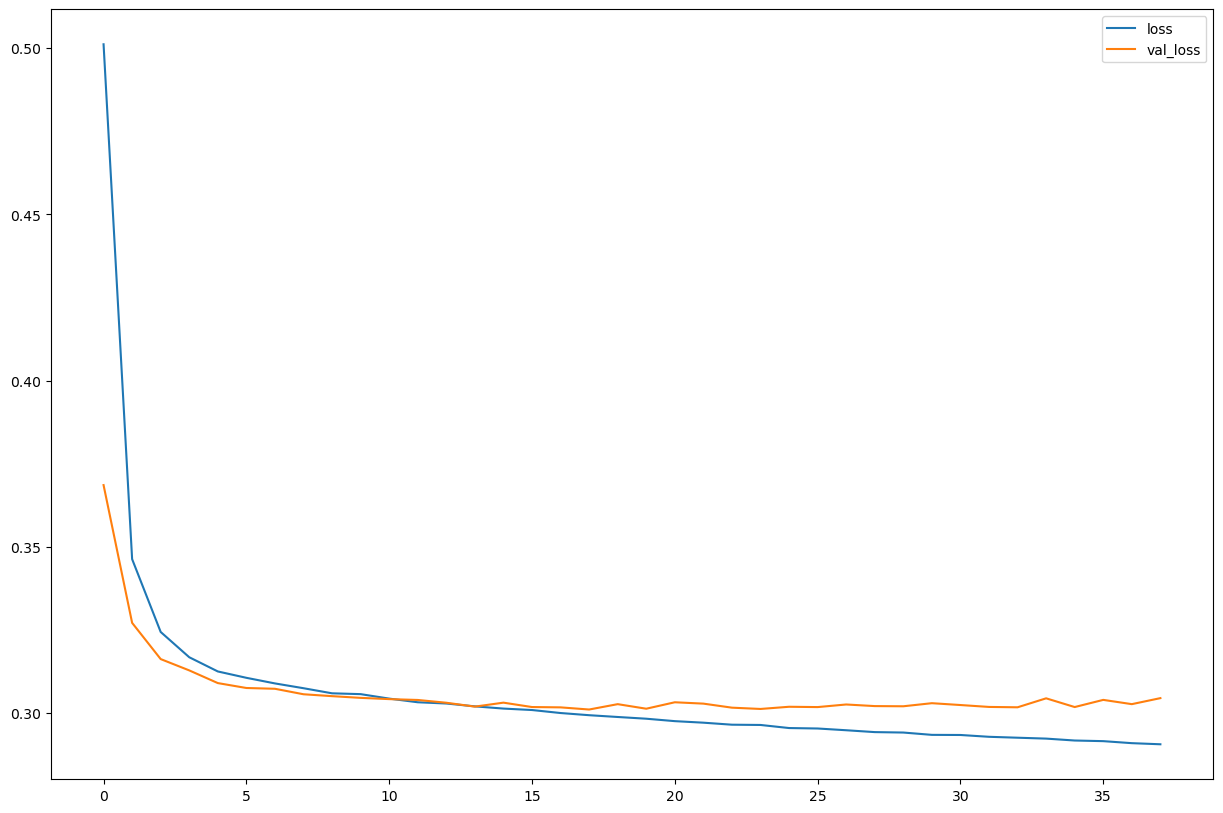

In [58]:
history_df[["loss", "val_loss"]].plot(figsize=(15,10))

<Axes: >

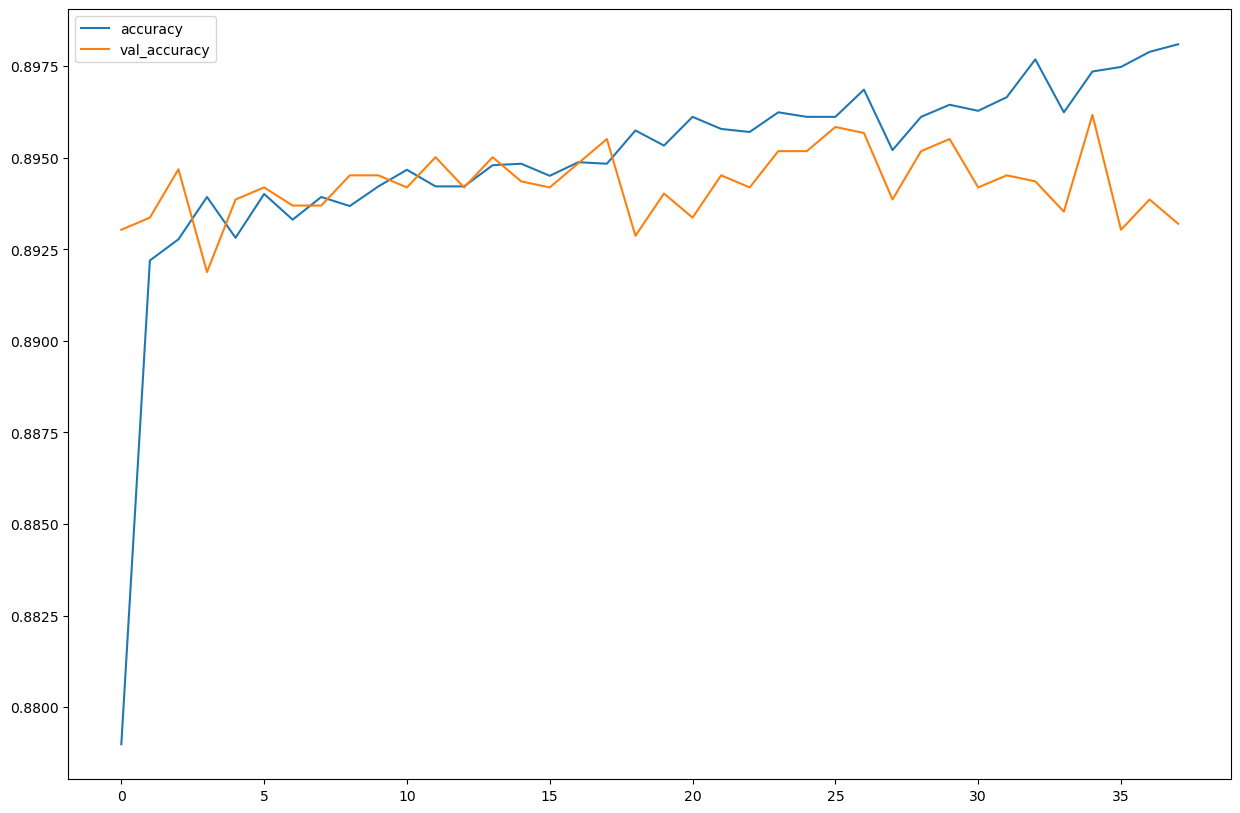

In [59]:
history_df[["accuracy", "val_accuracy"]].plot(figsize=(15,10))

467/467 [==============================] - 1s 1ms/step


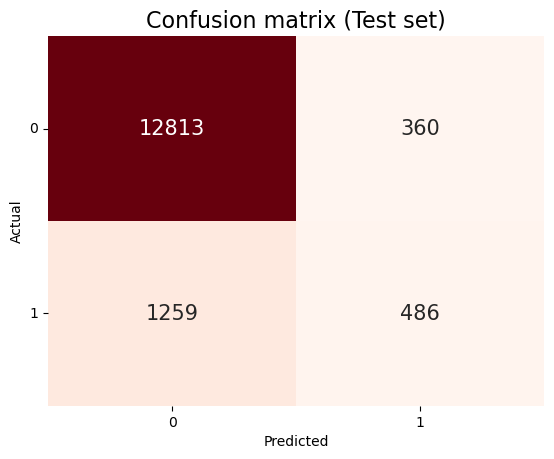

In [60]:
y_predicted = np.round(model.predict(X_test))

sns.heatmap(
    confusion_matrix(y_test, y_predicted),
    annot=True,
    fmt="g",
    cbar=False,
    cmap="Reds",
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (Test set)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
# Assuming you have your true labels and predicted probabilities
true_labels = y_test
predicted_probabilities = model.predict(X_test)

# Calculate accuracy
predicted_labels = (predicted_probabilities >= 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

467/467 [==============================] - 1s 1ms/step
Accuracy: 0.89


### Calculate weighted squared error 

In [63]:
n_samples = y_train.shape[0]
n_classes = 2
n_sample0 = (y_train == 0).sum()
n_sample1 = (y_train == 1).sum()

w0 = n_samples/(n_classes*n_sample0)
w1 = n_samples/(n_classes*n_sample1)

In [67]:
# Define the custom weighted squared error loss function

def weighted_squared_error(y_true, y_pred):
    weights = tf.constant([w0[0], w1[0]], dtype=tf.float32)  # Adjust weights accordingly
    y_true = tf.cast(y_true, tf.float32)  # Cast y_true to float32
    squared_error = tf.square(y_true - y_pred)
    weighted_error = tf.reduce_sum(weights * squared_error, axis=-1)
    return weighted_error

In [68]:
classes_number = 1

model = keras.Sequential()

model.add(layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(layers.Dense(12, activation = 'relu', kernel_regularizer='l2'))
model.add(layers.Dense(8, activation = 'relu', kernel_regularizer='l2'))
model.add(layers.Dense(classes_number, activation = 'sigmoid'))

# Convert y_train to a NumPy array with int32 data type
y_train = np.array(y_train, dtype=np.int32)

In [69]:
model.compile(loss=weighted_squared_error, optimizer='adam', metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)

history = model.fit(X_train, y_train, validation_split = 0.2,
                    batch_size = 64, epochs = 200,
                    callbacks = [early_stop])

Epoch 1/200
379/379 [==============================] - 2s 3ms/step - loss: 0.8154 - accuracy: 0.8281 - val_loss: 0.5544 - val_accuracy: 0.8940
Epoch 2/200
379/379 [==============================] - 1s 2ms/step - loss: 0.5221 - accuracy: 0.8917 - val_loss: 0.4868 - val_accuracy: 0.8912
Epoch 3/200
379/379 [==============================] - 1s 2ms/step - loss: 0.4722 - accuracy: 0.8925 - val_loss: 0.4516 - val_accuracy: 0.8935
Epoch 4/200
379/379 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.8928 - val_loss: 0.4385 - val_accuracy: 0.8940
Epoch 5/200
379/379 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8930 - val_loss: 0.4329 - val_accuracy: 0.8929
Epoch 6/200
379/379 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8937 - val_loss: 0.4289 - val_accuracy: 0.8934
Epoch 7/200
379/379 [==============================] - 1s 2ms/step - loss: 0.4286 - accuracy: 0.8943 - val_loss: 0.4247 - val_accuracy: 0.8942

In [70]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

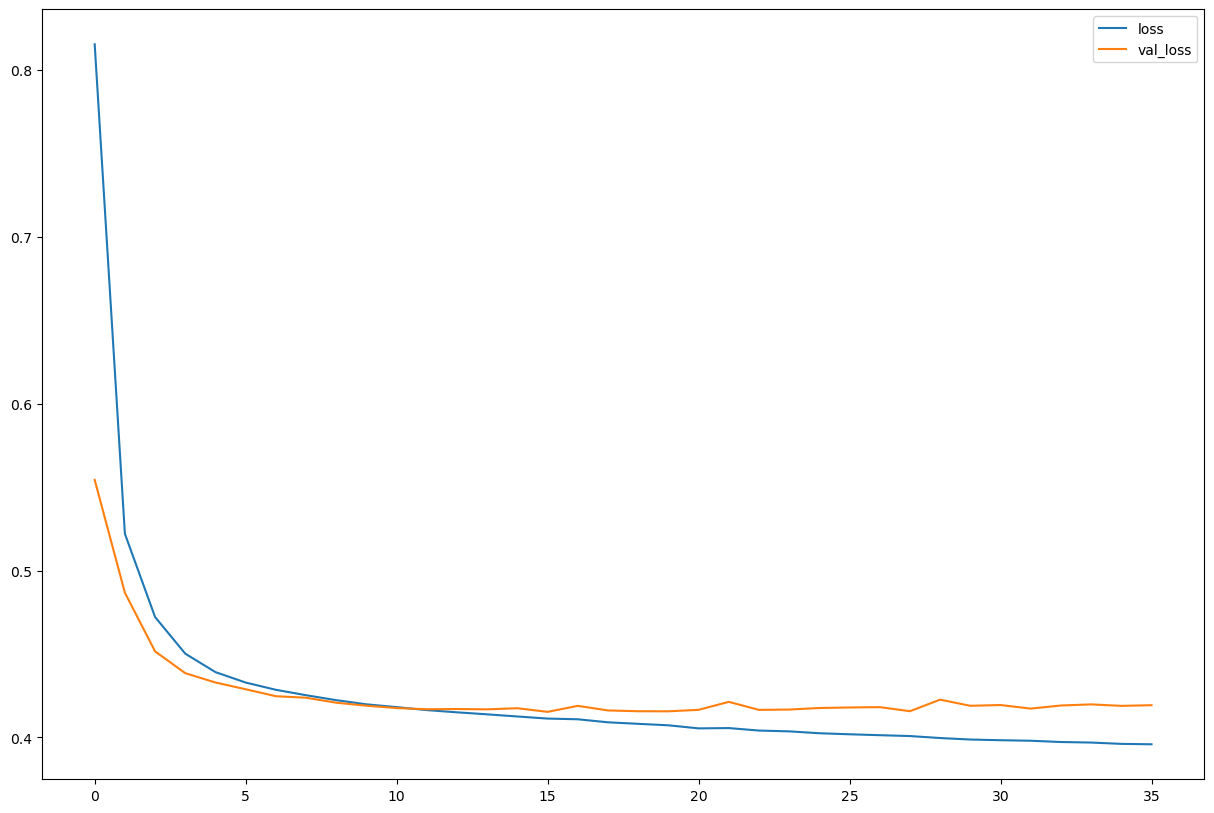

In [71]:
history_df[["loss", "val_loss"]].plot(figsize=(15,10))

<Axes: >

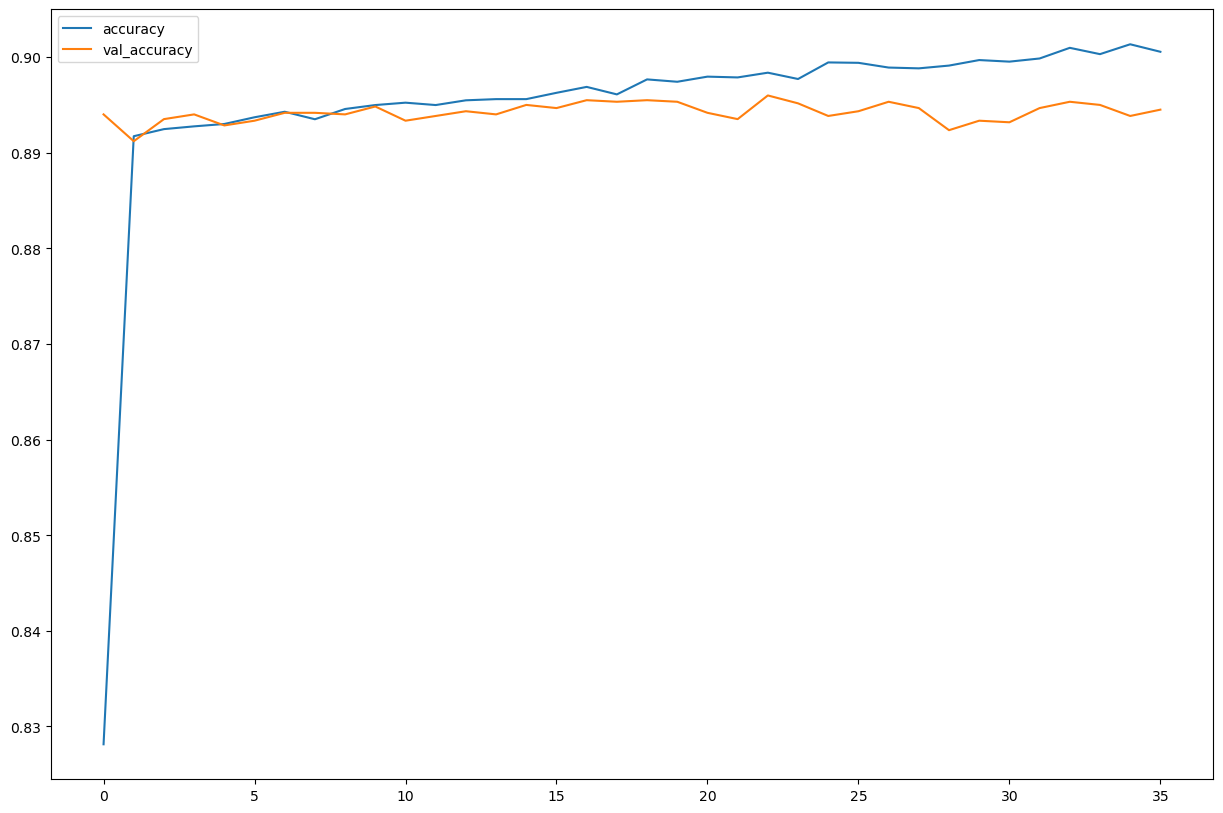

In [72]:
history_df[["accuracy", "val_accuracy"]].plot(figsize=(15,10))

467/467 [==============================] - 1s 1ms/step


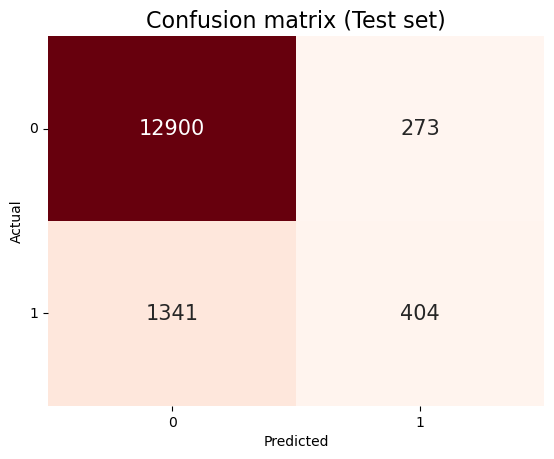

In [73]:
y_predicted = np.round(model.predict(X_test))

sns.heatmap(
    confusion_matrix(y_test, y_predicted),
    annot=True,
    fmt="g",
    cbar=False,
    cmap="Reds",
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (Test set)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
# Assuming you have your true labels and predicted probabilities
true_labels = y_test
predicted_probabilities = model.predict(X_test)

# Calculate accuracy
predicted_labels = (predicted_probabilities >= 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

467/467 [==============================] - 1s 1ms/step
Accuracy: 0.89


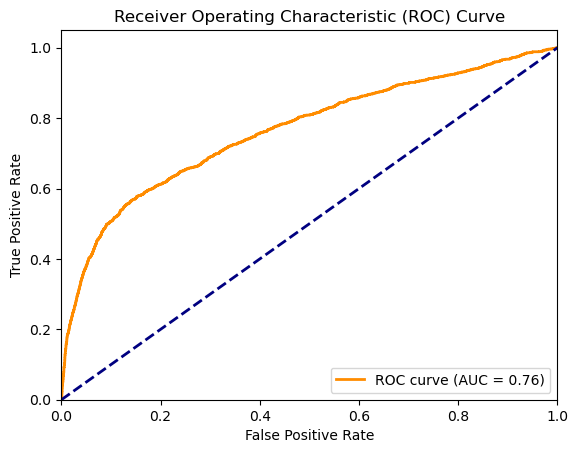

In [76]:
# Calculate ROC curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = roc_auc_score(true_labels, predicted_probabilities)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

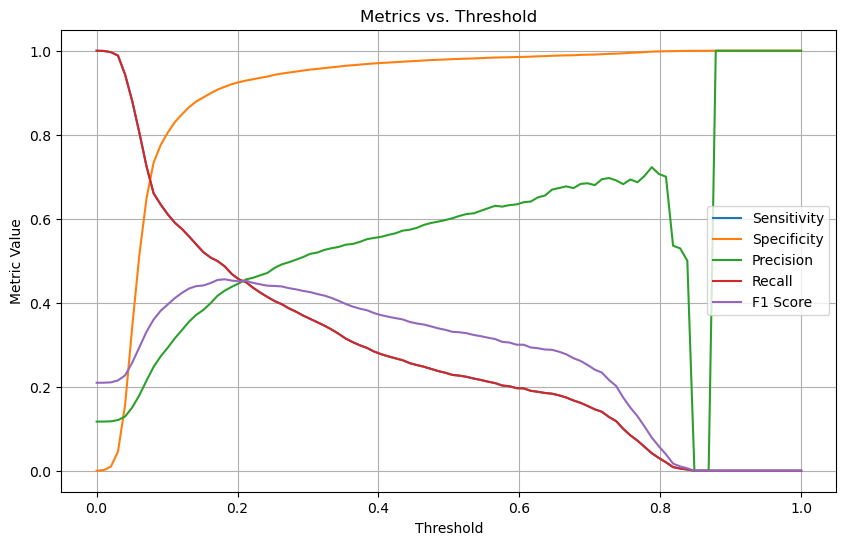

In [79]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define the true labels and predicted probabilities
true_labels = y_test
predicted_probs = predicted_probabilities

# Create an array of threshold values
thresholds = np.linspace(0, 1, 100)

# Initialize empty lists to store metric values
sensitivity_values = []
specificity_values = []
precision_values = []
recall_values = []
f1_values = []

# Calculate metrics for each threshold
for threshold in thresholds:
    predicted_labels = (predicted_probs >= threshold).astype(int)
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    precision = precision_score(true_labels, predicted_labels, zero_division=1)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    
    sensitivity_values.append(sensitivity)
    specificity_values.append(specificity)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

# Plot the metrics over different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, sensitivity_values, label='Sensitivity')
plt.plot(thresholds, specificity_values, label='Specificity')
plt.plot(thresholds, precision_values, label='Precision')
plt.plot(thresholds, recall_values, label='Recall')
plt.plot(thresholds, f1_values, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend()
plt.title('Metrics vs. Threshold')
plt.grid(True)
plt.show()

In [ ]:
# Initialize variables to store the optimal threshold and F1-score
optimal_threshold = 0
best_f1_score = 0

# Evaluate different thresholds and find the optimal one
for threshold in np.arange(0.1, 1.0, 0.1):
    predicted_labels = (predicted_probabilities >= threshold).astype(int)
    f1 = f1_score(true_labels, predicted_labels)
    if f1 > best_f1_score:
        best_f1_score = f1
        optimal_threshold = threshold

print(f"Optimal Threshold for F1-score: {optimal_threshold:.2f}")
print(f"Best F1-score: {best_f1_score:.2f}")

In [ ]:
# Apply the optimal threshold to get binary predictions
predicted_labels = (predicted_probabilities >= optimal_threshold).astype(int)

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

sns.heatmap(
    confusion,
    annot=True,
    fmt="g",
    cbar=False,
    cmap="Reds",
    annot_kws={"size": 15},
)
plt.title("Confusion matrix (Test set)", fontsize=16)
plt.yticks(rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Calculate accuracy
predicted_labels = (predicted_probabilities >= optimal_threshold).astype(int)  # Convert probabilities to binary predictions
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")